In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
%matplotlib inline

Mittelwert:  87.2653061224 +- 2.98974723234
A1= 400.322456757 , Standardfehler= 19.0114181481
l1= 0.0259275662117 , Standardfehler= 0.00233794546144
A2= 53.0509068836 , Standardfehler= 11.4552174332
l2= 0.00124013507839 , Standardfehler= 0.000760968172394
chi2_= 26.2253054645
chi2_red= 0.728480707348
Wahrscheinlichkeit= 88.0 %


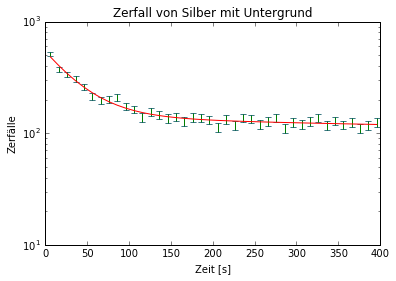

In [2]:
#silver decay

#load and calculate underground
unterg=np.loadtxt(r'C:\Users\Admin\Desktop/qtuntergrund.dat', usecols=[1])
mittelw_unterg=np.mean(4*unterg)
err_unterg=np.std(4*unterg)/np.sqrt(len(unterg))
print('Mittelwert: ', mittelw_unterg,'+-', err_unterg)

#load measured data
n1=np.loadtxt(r'C:\Users\Admin\Desktop/qtag1.dat', usecols=[1])
n2=np.loadtxt(r'C:\Users\Admin\Desktop/qtag2.dat', usecols=[1])
n3=np.loadtxt(r'C:\Users\Admin\Desktop/qtag3.dat', usecols=[1])
n4=np.loadtxt(r'C:\Users\Admin\Desktop/qtag4.dat', usecols=[1])

N=n1+n2+n3+n4
err_N=np.sqrt(N)

t=np.arange(6,406,10)

#plot measured data
plt.errorbar(t,N, err_N, linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zefälle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')

#fitting silver decay
y0=mittelw_unterg
def fit_func(x,A1,l1,A2,l2):
    return A1*np.exp(-x*l1)+A2*np.exp(-x*l2)+y0

popt, pcov=curve_fit(fit_func,t,N, p0=[391, 0.02, 44, 0.001], sigma=err_N)

#plot silver fit
plt.errorbar(t,N, err_N, linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
#plt.savefig('', format='pdf')

#print fit parameters, silver
print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("A2=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("l2=",popt[3], ", Standardfehler=", np.sqrt(pcov[3][3]))

#fit quality, silver
chi2_=np.sum((fit_func(t,*popt)-N)**2/err_N**2)
dof=len(N)-4
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")

A1= 955.140412046 , Standardfehler= 39.2125665818
l1= 0.000545006730767 , Standardfehler= 3.63560406955e-05
chi2_= 19.9215309054
chi2_red= 2.21350343393
Wahrscheinlichkeit= 2.0 %


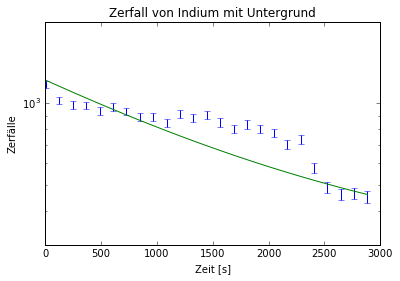

In [20]:
#indium decay

#adjust undergound
in_under = mittelw_unterg*3

#load measured data indium
ind=np.loadtxt(r'C:\Users\Admin\Desktop/qtind.dat', usecols=[1])
ind_err = np.sqrt(ind)

#indium fit
y0 = in_under
def indium_fit(x, A1, l1):
    return A1*np.exp(-x*l1)+y0

#fitting indium decay
t=np.arange(6, 3006, 120)
mask = [(t>2450) | (t<1200) &(t>300)]
popt, pcov=curve_fit(indium_fit,t[mask],ind[mask], p0=[500, 0.0002], sigma=ind_err[mask])

#plot indium fit
plt.errorbar(t, ind, ind_err, linestyle='None')
plt.xlabel('Zeit [s]')
plt.ylabel('Zerfälle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.ylim(3e2, 2e3)
plt.plot(t,indium_fit(t,*popt))

#print fit parameters, indium
print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))

#fit quality, indium
chi2_=np.sum((indium_fit(t[mask],*popt)-ind[mask])**2/ind_err[mask]**2)
dof=len(ind[mask])-2
chi2_red=chi2_/dof
print("chi2_=", chi2_)
print("chi2_red=", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob, "%")